# USED CAR PRICE PREDICTION:

## Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-


## 1.Data Collection Phase:

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. more the data better the model In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.


## 2.Model Building Phase:

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like.

1.Data Cleaning

2.Exploratory Data Analysis

3.Data Pre-processing

4.Model Building

5.Model Evaluation

6.Selecting the best model


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [12]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [13]:
# importing dataset
df = pd.read_excel("Used_cars.xlsx") # reading excel file
df.head()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2012 Maruti Swift Dzire,Diesel,"80,134 kms",-,manual,-,5,Grey,74@4000rpm,Ventilated Disc,Drum,320 liters,1555,1695,3995,1505,8.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,"3,13,000"
1,1,2019 Maruti S-Presso,Petrol,"24,268 kms",-,manual,-,5,White,67.05@5500rpm,Ventilated Disc,Drum,270,1564,1520,3565,1170,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,"3,69,500"
2,2,2019 Maruti Swift Dzire,Petrol,"11,935 kms",-,manual,-,5,Oxford Blue,81.80@6000rpm,Disc,Drum,378,1515,1735,3995,1315Kg,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,"6,80,000"
3,3,2016 Maruti Eeco,Petrol,"45,384 kms",-,manual,-,5,White,72.42@6000rpm,Disc,Drum,540,1825,1475,3675,1510,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,"2,99,500"
4,4,2018 Volkswagen Vento,Diesel,"98,027 kms",-,manual,-,5,Silver,108.6@4000rpm,Ventilated Disc,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,"7,86,500"


Since i have to predict the used car price and the Car_Price column is a continuous data so it's a Regression problem.

Since dropping the unwanted columns present in the dataset.


In [14]:
# Dropping the unnecessary columns 
df = df.drop(["Unnamed: 0"],axis=1)
df = df.drop(["Max_power"],axis=1)

### Features Information:

* Car_Name : Name of the car with Year
* Fuel_type : Type of fuel used for car engine
* Running_in_kms : Car running in kms till the date
* Gear_transmission : Type of gear transmission used in car
* Seating_cap : Availability of number of seats in the car
* color : Car color
* front_brake_type : type of brake system used for front-side wheels
* rear_brake_type : type of brake system used for back-side wheels
* cargo_volume : the total cubic feet of space in a car's cargo area.
* height : Total height of car in mm
* width : Width of car in mm
* length : Total length of the car in mm
* Weight : Gross weight of the car in kg
* Insp_score : inspection rating out of 10
* top_speed : Maximum speed limit of the car in km per hours
* City_url : Url of the page of cars from a particular city
* Car_price : Price of the car

In [15]:
# Checking shape of the dataset
df.shape

(5655, 19)

my dataset has 5655 rows and 17 columns.

In [16]:
# Checking all column names
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'front_brake_type', 'rear_brake_type', 'cargo_volume', 'height',
       'width', 'length', 'Weight', 'Insp_score', 'top_speed', 'City_url',
       'Car_price'],
      dtype='object')

Above are the list of column names in the dataset

In [17]:
# Checking for missing values
df.isnull().sum()

Car_Name               0
Fuel_type              0
Running_in_kms         0
Endine_disp            0
Gear_transmission      2
Milage_in_km/ltr       0
Seating_cap            0
color                  0
front_brake_type       2
rear_brake_type        2
cargo_volume         171
height                 0
width                  0
length                 0
Weight                 1
Insp_score             0
top_speed            706
City_url               0
Car_price              0
dtype: int64

There are some entries like '-' and 'null' so let's replace these with nan.

In [18]:
# Replacing unnecessary entries
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [19]:
# Checking for nan values again
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp          5646
Gear_transmission       2
Milage_in_km/ltr     5646
Seating_cap           333
color                 350
front_brake_type      373
rear_brake_type       373
cargo_volume         1118
height                387
width                 388
length                387
Weight               2948
Insp_score           5006
top_speed            2084
City_url                0
Car_price               0
dtype: int64

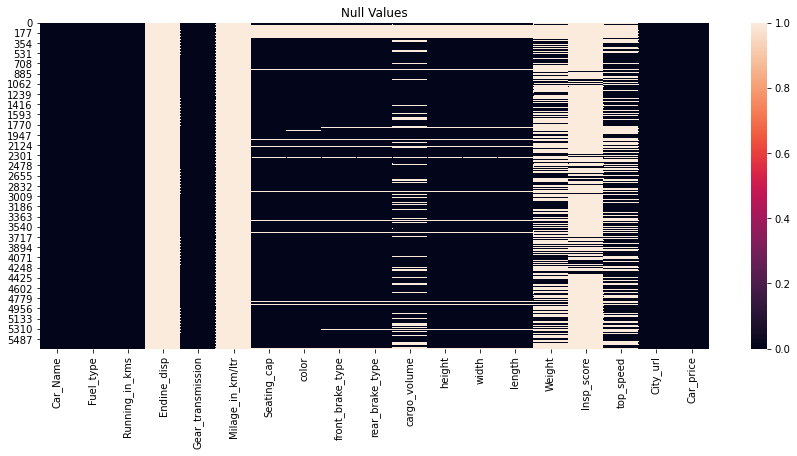

In [20]:
# Visualizing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is huge null values in the dataset.

In cargo_volume and Insp_score there is more than 50% null values so let's drop those columns.

In [21]:
# Dropping unnecessary columns
df.drop(columns = ['cargo_volume','Insp_score'], inplace = True)

In [22]:
# Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5655 entries, 0 to 5654
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           5655 non-null   object
 1   Fuel_type          5655 non-null   object
 2   Running_in_kms     5655 non-null   object
 3   Endine_disp        9 non-null      object
 4   Gear_transmission  5653 non-null   object
 5   Milage_in_km/ltr   9 non-null      object
 6   Seating_cap        5322 non-null   object
 7   color              5305 non-null   object
 8   front_brake_type   5282 non-null   object
 9   rear_brake_type    5282 non-null   object
 10  height             5268 non-null   object
 11  width              5267 non-null   object
 12  length             5268 non-null   object
 13  Weight             2707 non-null   object
 14  top_speed          3571 non-null   object
 15  City_url           5655 non-null   object
 16  Car_price          5655 non-null   object


Above is the info about the dataset and i can see some missing values in the dataset. I have to take care of those missing values.

### Feature Extraction:

#### Car_Name:

Since Car_name column has year of manufacture, car model and car name all together so we have to separate them.

In [23]:
# Extracting manufacturing year and car name from Car_Name
df['Manu_year'] = df['Car_Name'].str[0:4]
df['car_name'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [24]:
df['Car_Brand'] = df.car_name.str.split(' ').str.get(1)
df['Car_Model'] = df.car_name.str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')
df.drop(columns = 'car_name', inplace = True)

#### Car_Price:

Since Car_Price is our target it should be in the format of continuous data, so we have change the car_price column from lakhs and crores to integer format.

In [25]:
df['Car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['Car_price'] = df['Car_price'].str.replace(',','')

In [26]:
df[['a']] = df.Car_price.str.split(expand=True)

In [27]:
df['a'] = df['a'].astype('float')

In [28]:
#Checking for null values in b column
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp          5646
Gear_transmission       2
Milage_in_km/ltr     5646
Seating_cap           333
color                 350
front_brake_type      373
rear_brake_type       373
height                387
width                 388
length                387
Weight               2948
top_speed            2084
City_url                0
Car_price               0
Manu_year               0
Car_Brand               0
Car_Model               0
a                       0
dtype: int64

In [29]:
df['car_price'] = df['a']  

In [30]:
df.drop(columns = ['Car_price','a'], inplace = True)

#### Running_in_kms:

Since this column should be int datatype but it has some string values and ',' in between so let's replace them.

In [31]:
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace('1 Lakh ','100000')
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

In [32]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Manu_year             object
Car_Brand             object
Car_Model             object
car_price            float64
dtype: object

### Converting the data type of columns height, width and length to float datatype:

In [33]:
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')
df.height = df.height.astype('float')
df.width = df.width.astype('float')
df.length = df.length.astype('float')

### Weight:

 The datatype of Weight has to be changed to float.

In [34]:
# getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

df.Weight = df.Weight.astype('float')

### top_speed:

Let's change the datatype of top_speed column to float

In [35]:
# getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]
df.top_speed = df.top_speed.astype('float')

### City_url:

Let's extract city name from city url column.

In [36]:
# Checking value counts of City_url column
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+new-delhi    1480
https://www.cardekho.com/used-cars+in+mumbai       1480
https://www.cardekho.com/used-cars+in+pune         1103
https://www.cardekho.com/used-cars+in+noida         818
https://www.cardekho.com/used-cars+in+kolkata       594
https://www.cardekho.com/used-cars+in+ahmedabad      60
https://www.cardekho.com/used-cars+in+delhi-ncr      20
https://www.cardekho.com/used-cars+in+jaipur         20
https://www.cardekho.com/used-cars+in+chennai        20
https://www.cardekho.com/used-cars+in+bangalore      20
https://www.cardekho.com/used-cars+in+hyderabad      20
https://www.cardekho.com/used-cars+in+gurgaon        20
Name: City_url, dtype: int64

In [37]:
# Replacing city names from city urls
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'delhi-ncr')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'new-delhi')

In [38]:
# Let's check the value count again
df['city_name'].value_counts()

new-delhi    1480
mumbai       1480
pune         1103
noida         818
kolkata       594
ahmedabad      60
Chennai        20
hyderabad      20
jaipur         20
delhi-ncr      20
gurgaon        20
Bangalore      20
Name: city_name, dtype: int64

Since we have extracted city names let's drop City_url

In [39]:
# Dropping unnecessary column
df.drop(columns = 'City_url', inplace = True)

### Seating_cap:

Let's change the data type of seating_cap to float type

In [40]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

### Manu_Year:

Let's extract car age from manufactured year.

In [41]:
df.Manu_year = df.Manu_year.astype('float')
df['Car_age'] = 2021 - df['Manu_year']
df.drop(columns = 'Manu_year', inplace = True)

### front_brake_type:

Let's group the similar entries in this column.

In [42]:
# checking the value counts of front_brake_type
df['front_brake_type'].value_counts()

Disc                                        3009
Ventilated Disc                             1970
Solid Disc                                    73
Ventilated Discs                              63
Disc & Caliper Type                           34
Disk                                          29
Ventilated discs                              21
Ventilated DIsc                               13
Drum                                          13
Multilateral Disc                              9
Vantilated Disc                                6
Electric Parking Brake                         6
Ventlated Disc                                 6
Ventilated Disk                                4
Vacuum assisted hydraulic dual circuit w       3
disc                                           3
Disc & Drum                                    2
Disc brakes                                    2
Ventillated Disc                               2
264mm Ventilated discs                         2
Mechanical-hydraulic

In [43]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [44]:
#checking the value counts of front_brake_type again
df['front_brake_type'].value_counts()

Disc                                        3116
Ventilated Disc                             2088
Disc & Caliper Type                           34
Drum                                          13
Multilateral Disc                              9
Electric Parking Brake                         6
Vacuum assisted hydraulic dual circuit w       3
Disc brakes                                    2
ventilated Disc                                2
Mechanical-hydraulic dual circuit              2
Disc & Drum                                    2
Caliper Ventilated Disc                        1
Disc Brakes with Inner cooling                 1
8-piston caliper front brakes                  1
Dual Circuit with ABS, ABS with BAS            1
Dual Cast Brake Discs                          1
Name: front_brake_type, dtype: int64

### Rare_brake_type:

Let's group the similar entries in this column.

In [45]:
# checking value counts of rare_break_type column
df['rear_brake_type'].value_counts()

Drum                                        4211
Disc                                         627
Ventilated Disc                              142
Solid Disc                                    92
Leading-Trailing Drum                         38
Disc & Caliper Type                           34
Discs                                         32
Ventilated Discs                              24
Ventilated discs                              21
Self-Adjusting Drum                           13
Drums                                          9
Electric Parking Brake                         6
Leading & Trailing Drum                        5
Ventilated Drum                                5
Disc & Drum                                    3
drum                                           3
Vacuum assisted hydraulic dual circuit w       3
Self Adjusting Drum                            2
262mm Disc & Drum Combination                  2
Mechanical-hydraulic dual circuit              2
Dual Circuit with AB

In [46]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)
 

df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

In [47]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in the dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Petrol               3511
Diesel               2043
CNG                    96
Electric(Battery)       3
LPG                     2
Name: Fuel_type, dtype: int64
****************************************
65000.0      70
55000.0      56
60000.0      55
50000.0      49
40000.0      48
45000.0      47
70000.0      47
62000.0      41
35000.0      40
48000.0      40
56000.0      39
68000.0      39
25000.0      38
75000.0      36
39000.0      36
80000.0      36
52000.0      35
63000.0      34
54000.0      34
42000.0      33
53000.0      32
38000.0      31
51000.0      31
20000.0      31
44000.0      31
57000.0      30
36000.0      30
58000.0      30
28000.0      29
32000.0      29
41000.0      28
18000.0      27
72000.0      27
30000.0      27
78000.0      26
64000.0      26
67000.0      25
71000.0      25
90000.0      24
34000.0      23
85000.0      23
24000.0      22
77000.0      22
11000.0      22
49000.0      22
37000.0      22
19000.0      21
69000.0      21
46000.0      21
15000.0      21

Now the dataset is good to work let's save this cleaned data set for further assistance.

In [48]:
# Saving the cleaned data into excel file
df.to_excel("Cleaned_used_cars_data.xlsx")

In [49]:
# Checking the datatypes of all columns after cleaning
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap          float64
color                 object
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
Car_Brand             object
Car_Model             object
car_price            float64
city_name             object
Car_age              float64
dtype: object

Now in my dataset i have two types of datas

In [50]:
# checking unique values of each column
df.nunique()

Fuel_type               5
Running_in_kms       2630
Endine_disp             7
Gear_transmission       2
Milage_in_km/ltr        8
Seating_cap             7
color                 189
front_brake_type       16
rear_brake_type        15
height                206
width                 199
length                274
Weight                198
top_speed             108
Car_Brand              31
Car_Model             234
car_price            1521
city_name              12
Car_age                23
dtype: int64

Above are the unique value counts of each column. I don't find anything unnecessary so let's proceed.

### Imputation technique to replace nan values:

In [51]:
# checking null values in the dataset
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp          5646
Gear_transmission       2
Milage_in_km/ltr     5646
Seating_cap           333
color                 350
front_brake_type      373
rear_brake_type       373
height                387
width                 388
length                387
Weight               2948
top_speed            2084
Car_Brand               0
Car_Model               0
car_price               0
city_name               0
Car_age                 0
dtype: int64

In the numerical columns with skewness null values has to be replaced by median.

In [52]:
#Replacing nan values
for col in ['height','width','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].median())
for col in ['length']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Seating_cap','color','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [53]:
# checking null values in the dataset again
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp          5646
Gear_transmission       2
Milage_in_km/ltr     5646
Seating_cap             0
color                   0
front_brake_type        0
rear_brake_type         0
height                  0
width                   0
length                  0
Weight                  0
top_speed               0
Car_Brand               0
Car_Model               0
car_price               0
city_name               0
Car_age                 0
dtype: int64

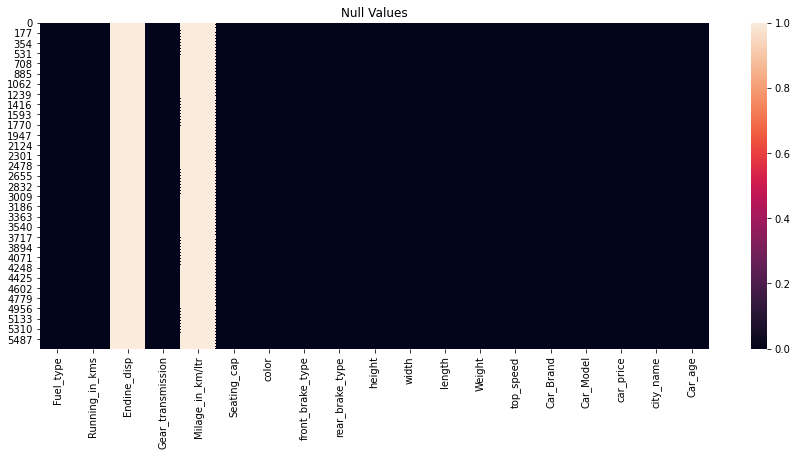

In [54]:
# visualizing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Almost we replaced the all null values successfully.

In [55]:
# Printing the dataset
df.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
0,Diesel,80134.0,NaN,manual,NaN,5.0,Grey,Ventilated Disc,Drum,1555.0,1695.0,3995.0,1505.0,170.0,Maruti,Swift Dzire,313000.0,ahmedabad,9.0
1,Petrol,24268.0,NaN,manual,NaN,5.0,White,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,170.0,Maruti,S-Presso,369500.0,ahmedabad,2.0
2,Petrol,11935.0,NaN,manual,NaN,5.0,Oxford Blue,Disc,Drum,1515.0,1735.0,3995.0,1315.0,170.0,Maruti,Swift Dzire,680000.0,ahmedabad,2.0
3,Petrol,45384.0,NaN,manual,NaN,5.0,White,Disc,Drum,1825.0,1475.0,3675.0,1510.0,170.0,Maruti,Eeco,299500.0,ahmedabad,5.0
4,Diesel,98027.0,NaN,manual,NaN,5.0,Silver,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,Volkswagen,Vento,786500.0,ahmedabad,3.0


In [56]:
# checking description of data set
df.describe()

,Running_in_kms,Seating_cap,height,width,length,Weight,top_speed,car_price,Car_age
count,5.655000e+03,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5.655000e+03,5655.000000
mean,5.332343e+04,5.190805,1561.779487,1724.337754,4106.327449,1603.681698,173.067728,8.086824e+05,5.943059
std,1.097203e+05,0.660032,106.063423,128.407564,402.549534,326.952046,21.666104,1.100141e+06,3.108794
min,3.000000e+02,2.000000,1249.000000,1410.000000,3099.000000,1140.000000,86.000000,2.800000e+04,0.000000
25%,3.000000e+04,5.000000,1495.000000,1680.000000,3765.000000,1520.000000,165.000000,3.400000e+05,4.000000
50%,5.000000e+04,5.000000,1521.000000,1700.000000,3995.000000,1520.000000,170.000000,4.899990e+05,6.000000
75%,7.000000e+04,5.000000,1627.000000,1770.000000,4425.000000,1520.000000,175.000000,7.750000e+05,8.000000
max,8.000000e+06,9.000000,1995.000000,2226.000000,6092.000000,3350.000000,318.000000,1.600000e+07,23.000000


Above is the statistics of the dataset.

### Visualization:

### Univariate Analysis:

In [57]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Fuel_type', 'Endine_disp', 'Gear_transmission', 'Milage_in_km/ltr', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns present.

In [58]:
# now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Running_in_kms', 'Seating_cap', 'height', 'width', 'length', 'Weight', 'top_speed', 'car_price', 'Car_age']


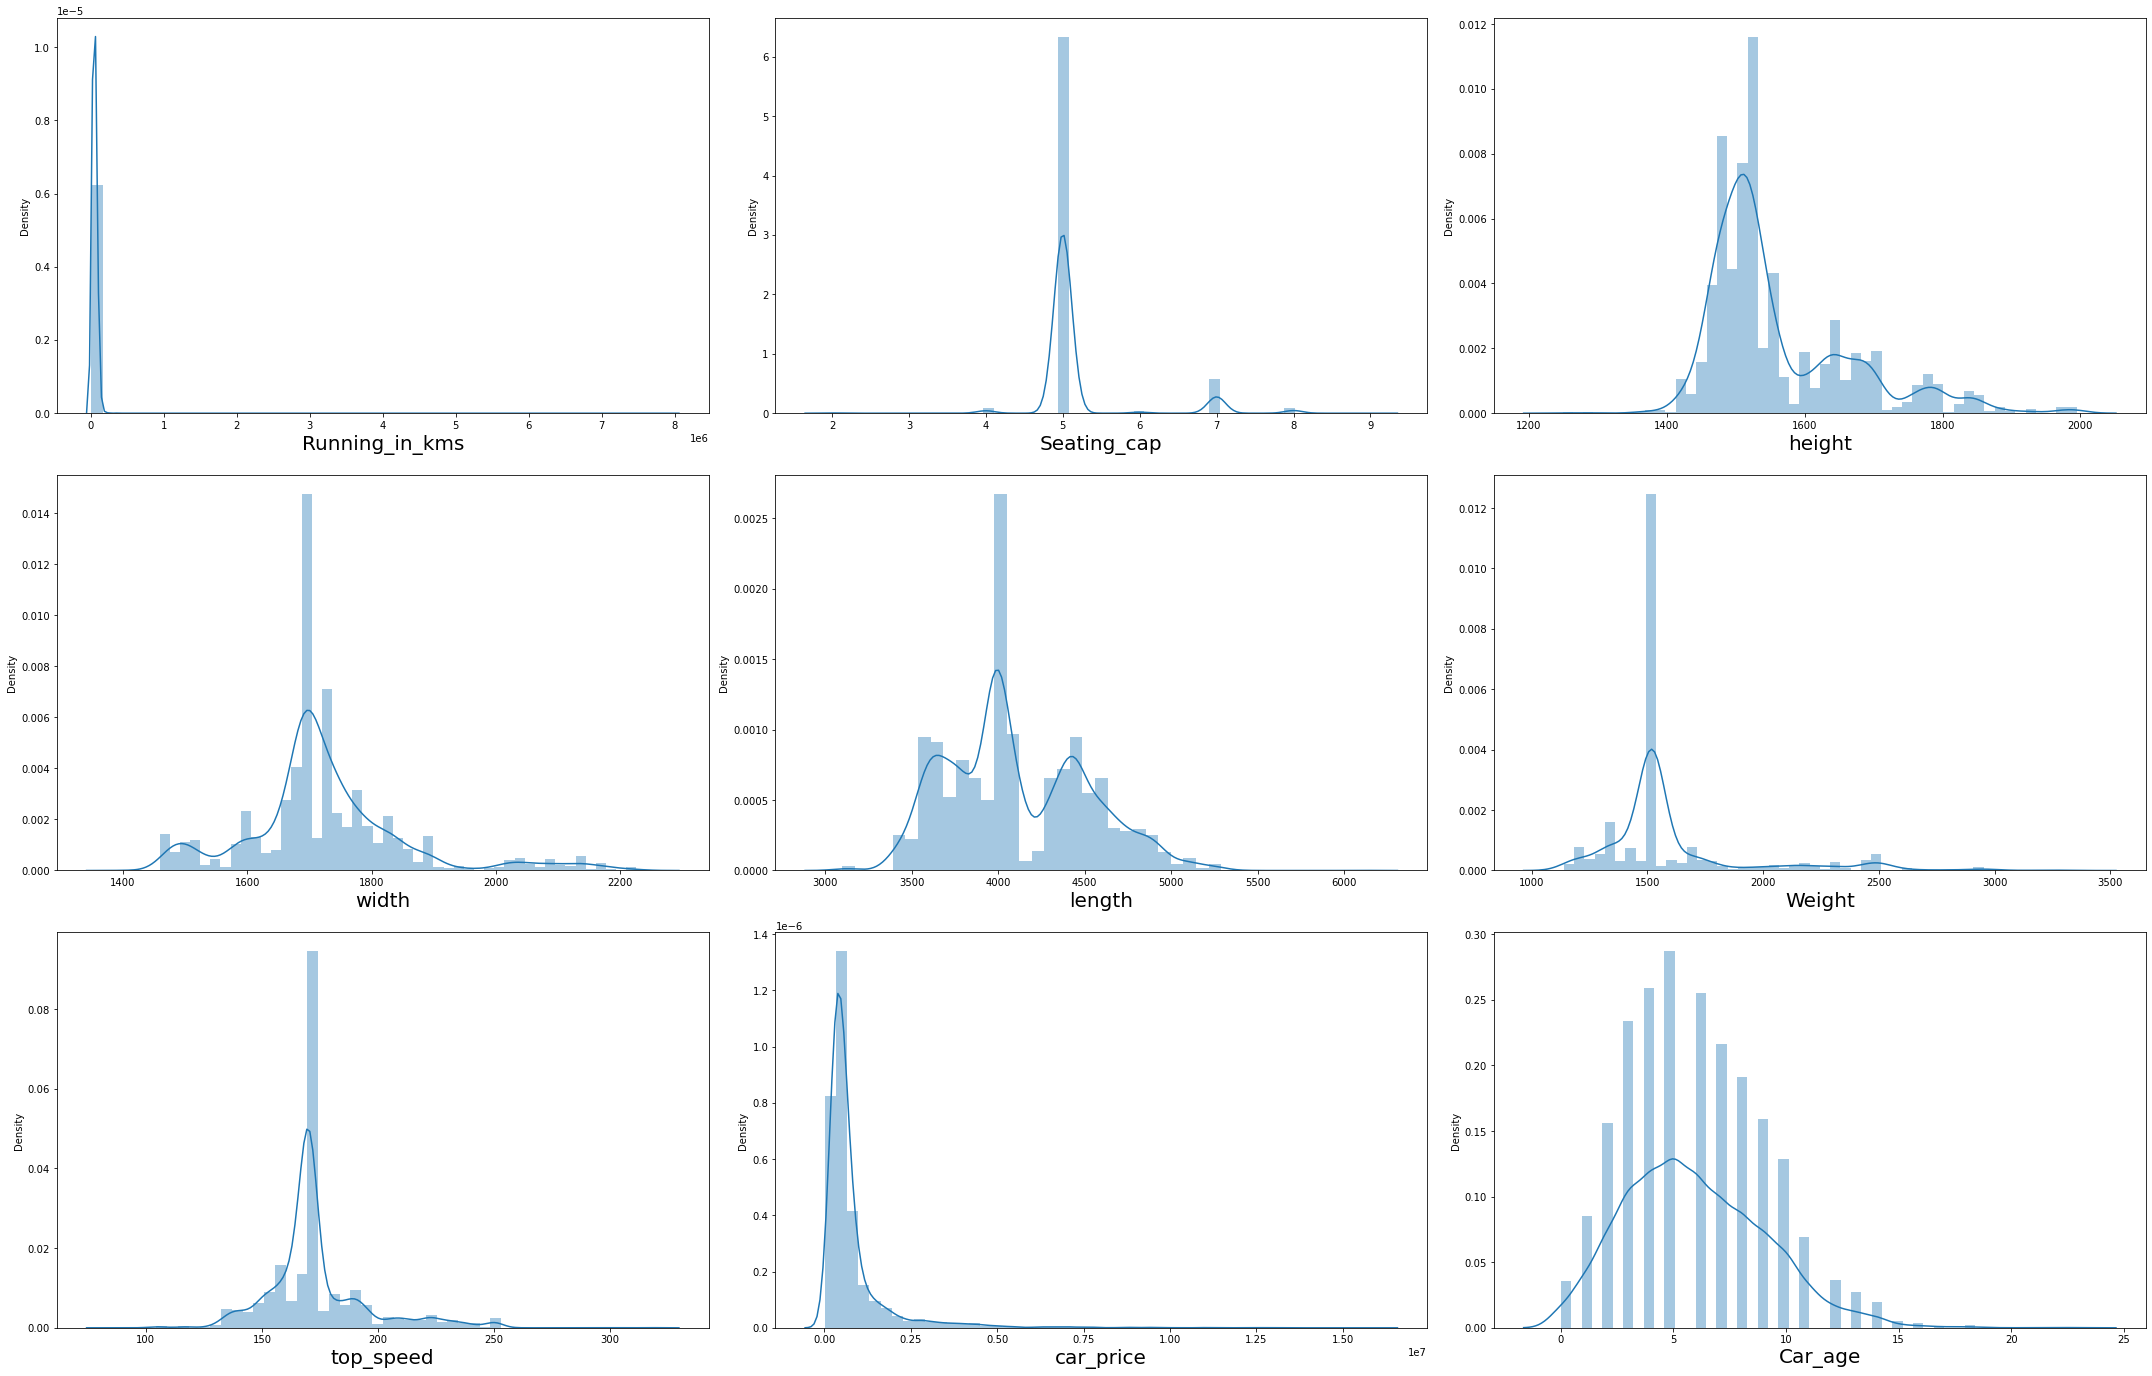

In [59]:
# distribution plot for all numerical columns
plt.figure(figsize = (30,25))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

There is skewness in almost all numerical columns.

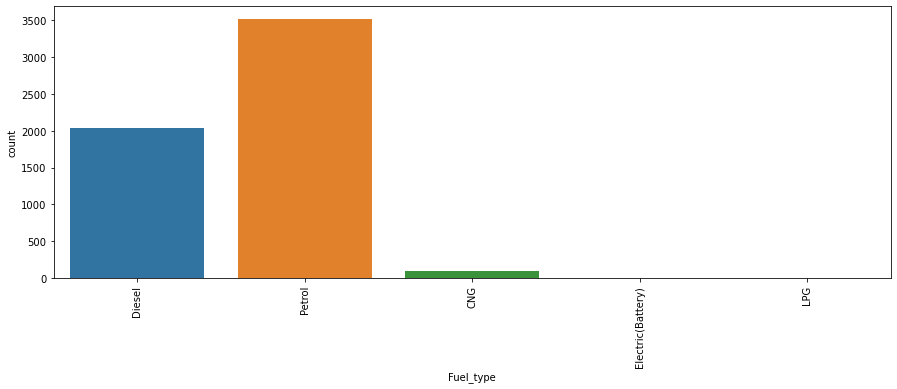

In [60]:
# count plot for Fuel_type column
plt.figure(figsize=[15,5])
sns.countplot(df['Fuel_type'])
plt.xticks(rotation=90);

Maximum cars are petrol driven and also diesel driven where as cng stands after petrol and diesel.

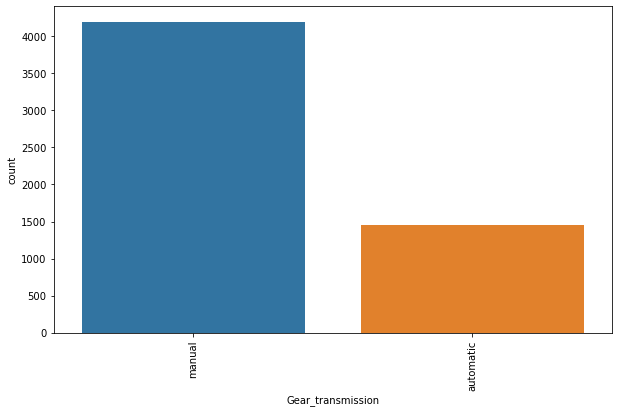

In [61]:
# count plot for Gear_transmission column
plt.figure(figsize=[10,6])
sns.countplot(df['Gear_transmission'])
plt.xticks(rotation=90);

Maximum cars are with Manual gear transmission only.

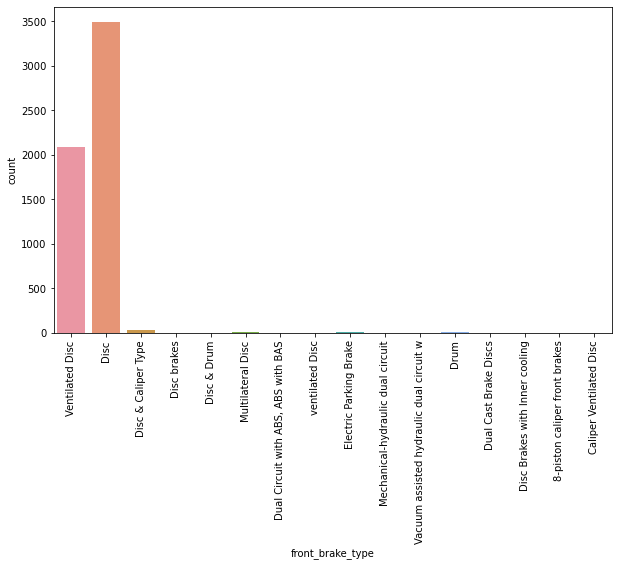

In [62]:
# count plot for front_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'])
plt.xticks(rotation=90);

 Ventilated Disc front brake cars are more in number followed by Disc.

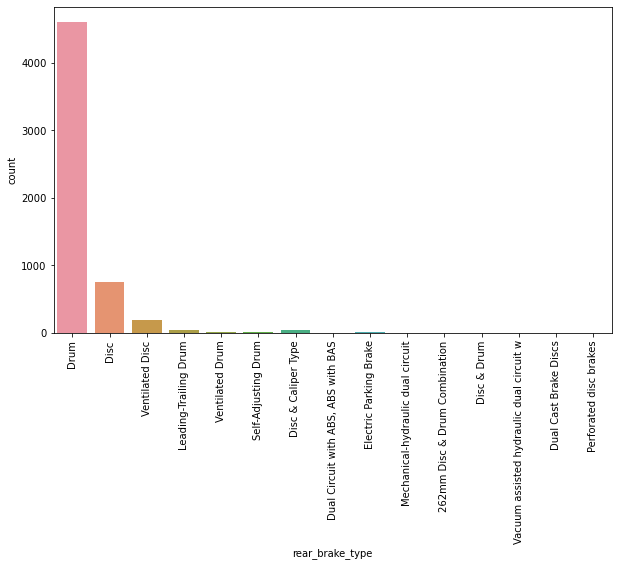

In [63]:
# count plot for rear_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'])
plt.xticks(rotation=90);

Drum rare break cars are more in number.

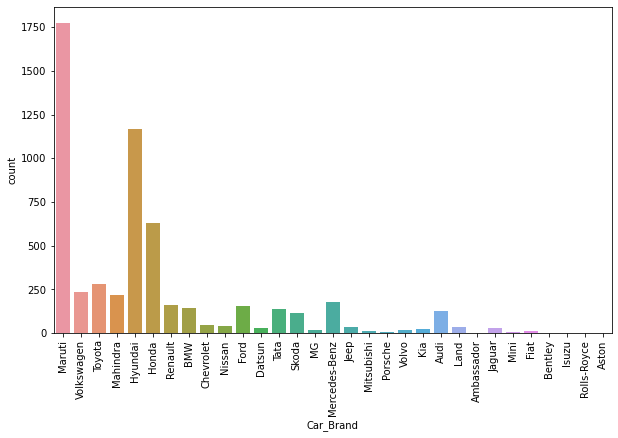

In [64]:
# count plot for Car_Brand column
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'])
plt.xticks(rotation=90);

Maximum cars under sale are Maruti followed by Hyundai.

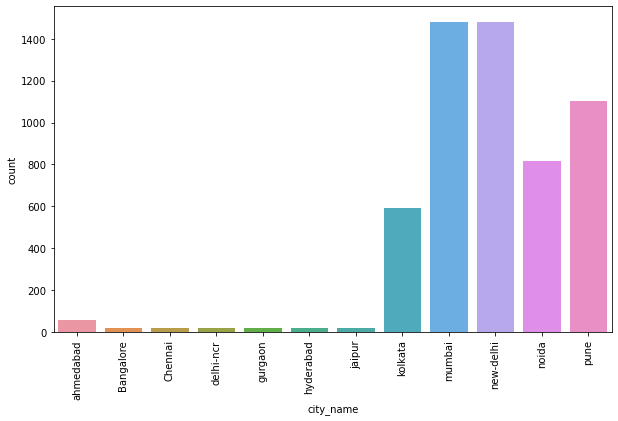

In [65]:
# count plot for city_name column
plt.figure(figsize=[10,6])
sns.countplot(df['city_name'])
plt.xticks(rotation=90);

In Mumbai and new-delhi we can find maximum cars for sale. Since these are two  populated places but their followed by pune,noida and kolkata after mumbai and new-delhi.

### Bivariate Analysis:

In [66]:
col=['Running_in_kms', 'height', 'width', 'length', 'Weight', 'top_speed']

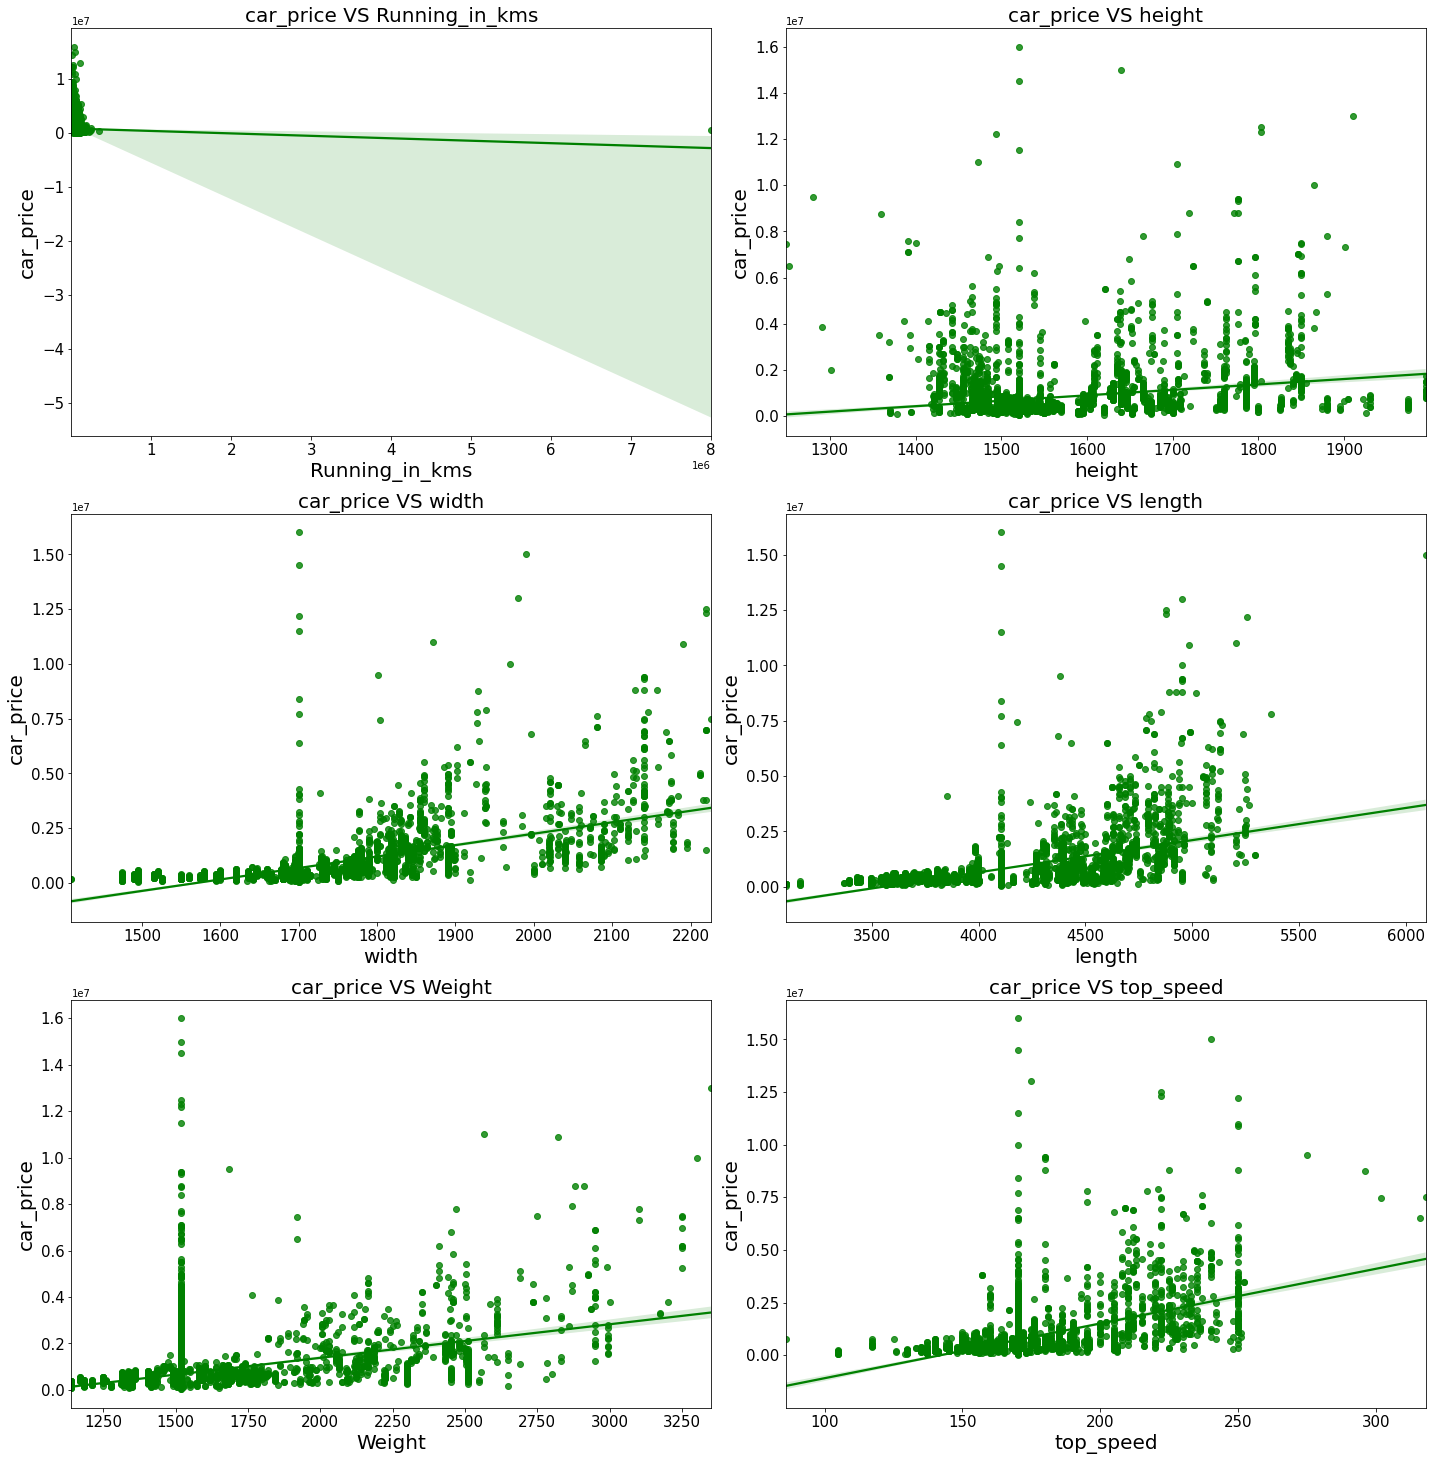

In [67]:
# regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['car_price'],color="g")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

##### Observation:

* Maximum cars are having below 20k driven kms. And car price is high for less driven cars.
* Car_price has no proper relation with height.
* As the width is increasing car price is also increasing.
* As length is increasing car price is also increasing.
* Weight also has linear relationship with car price.
* As top_speed is increasing car price is also increasing.

In [68]:
col1=['Seating_cap','Car_age']

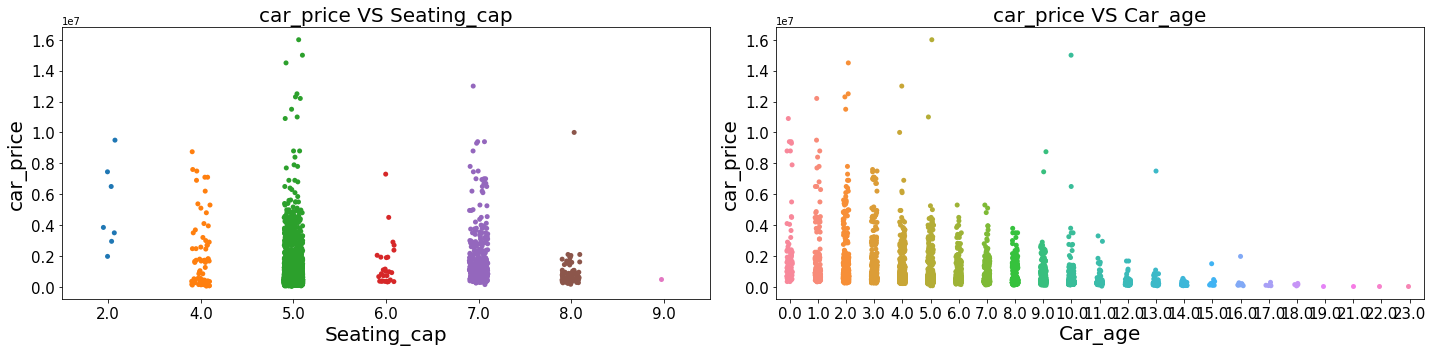

In [69]:
# stripplot for numerical columns
plt.figure(figsize=(20,5))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['car_price'])
    plt.title(f"car_price VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

* Cars with 5 and 7 seats are having highest price.
* As the age of the car increases the car price decreases.

In [70]:
col2=['Fuel_type', 'Gear_transmission', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'city_name']

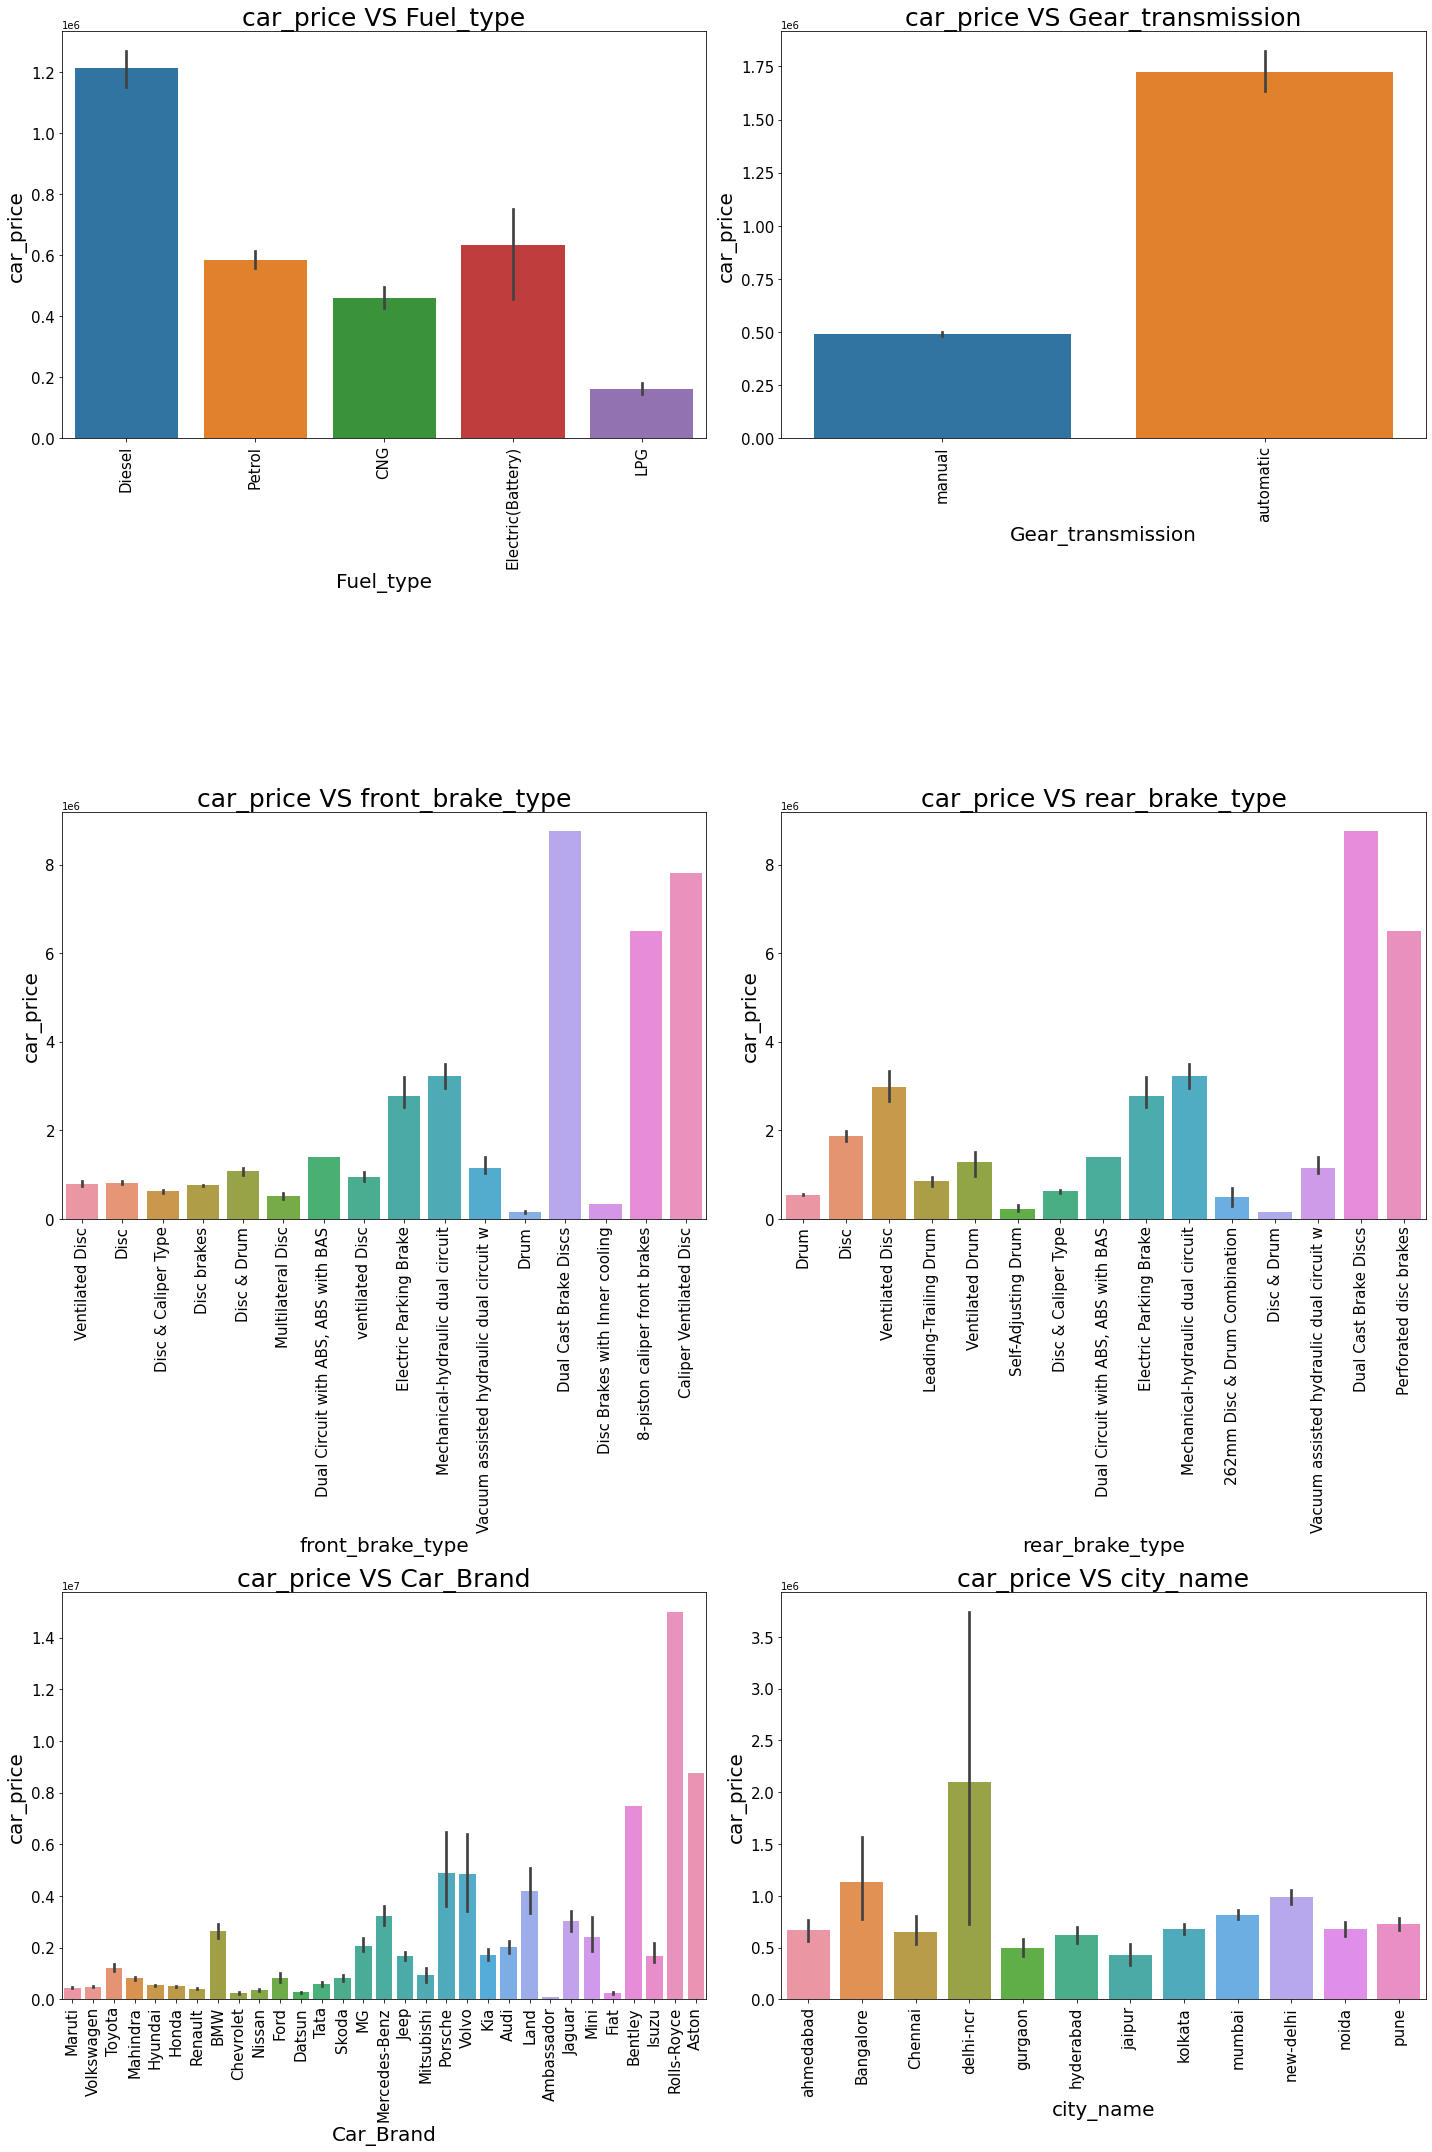

In [71]:
# Bar plot for all categorical columns
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['car_price'],x=df[col2[i]])
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

##### Observations:

* For Diesel and Electric cars the price is high compared to Petrol,LPG and CNG.
* Cars with automatic gear are costlier than manual gear cars.
* Cars with Carbon Ceramic front break are costlier compared to other cars.
* Cars with carbon Ceramic rear braek are costlier compared to other cars.
* Rolls Royce brand cars are having highset sale price.
* In Delhi-Ncr,bangalore and new delhi have the car prices are high as they are highly populated cities.

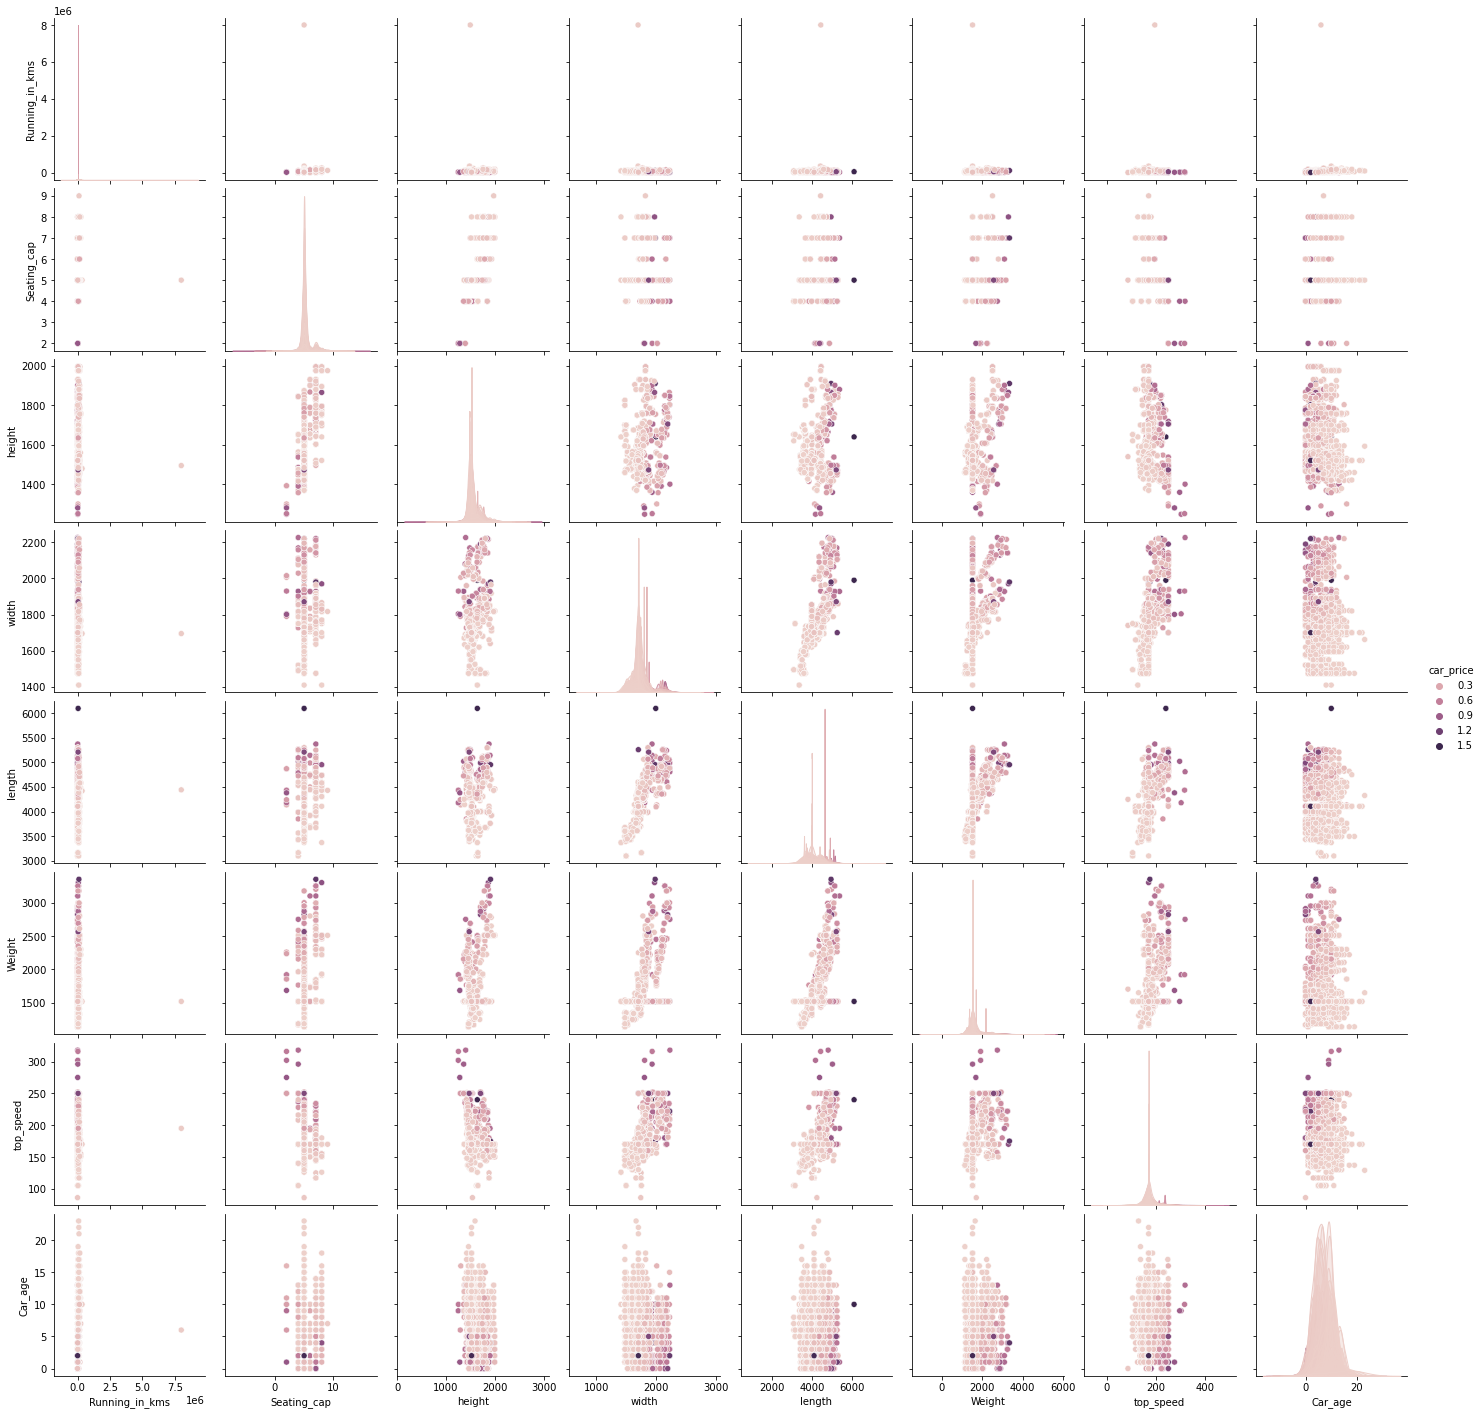

In [72]:
# pair ploting for df
sns.pairplot(df,hue="car_price")

By looking into the pair plot of pair of features we can notice some amount of outliers in each plot so we have to deal with this.

### Checking for outliers:

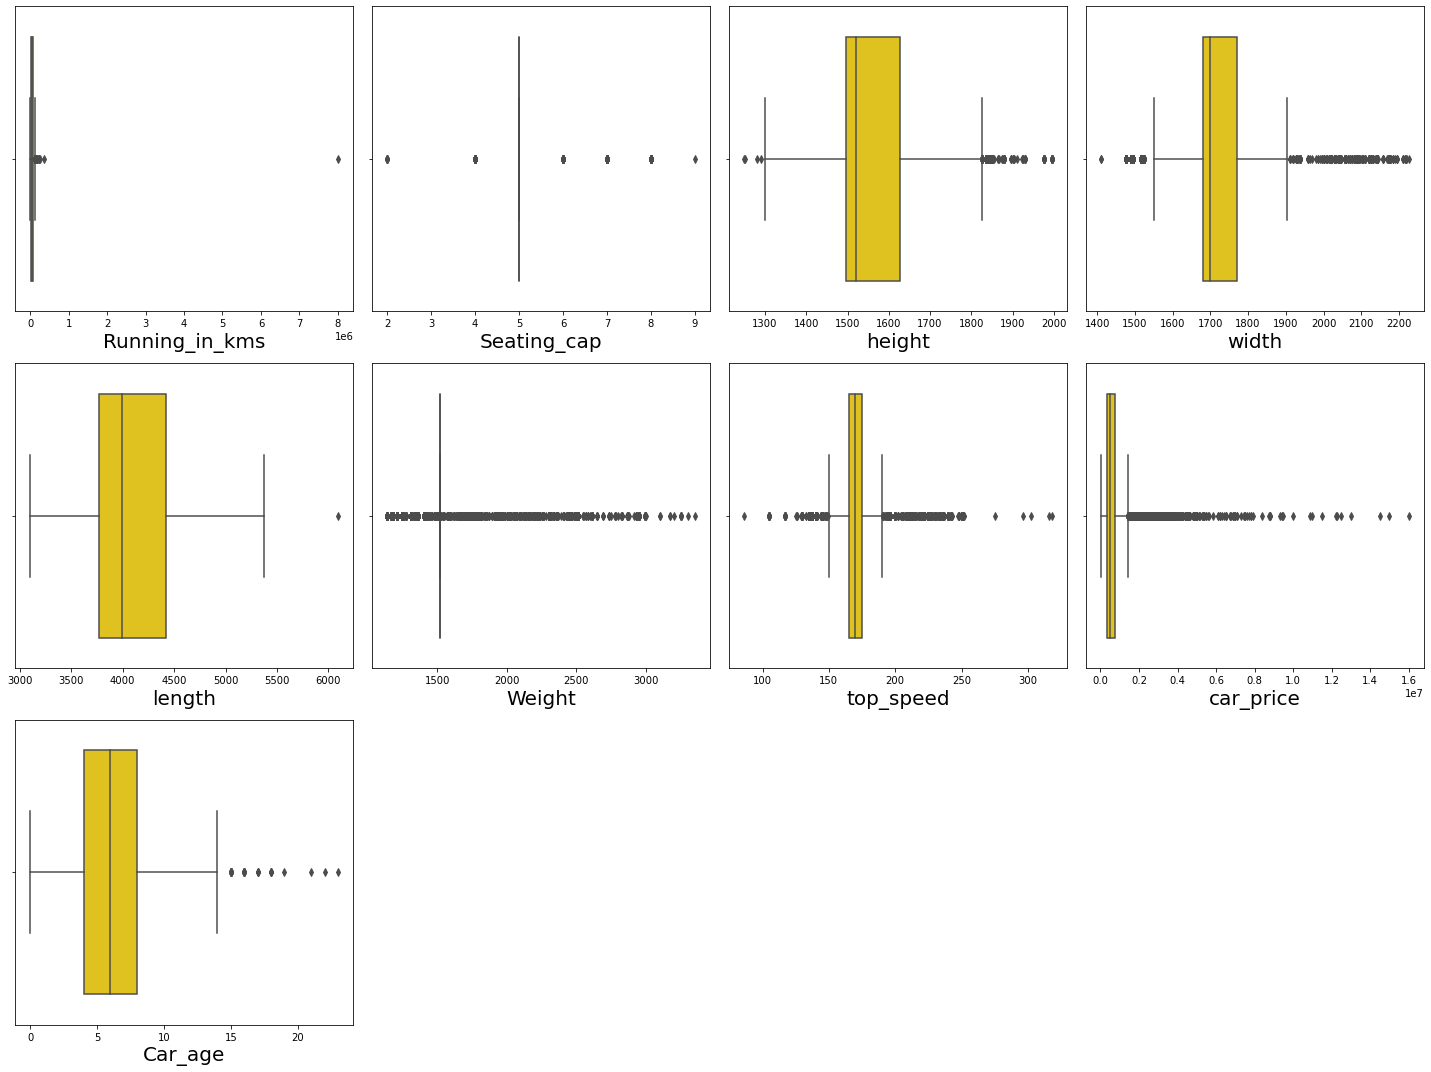

In [73]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in all columns except length. Since car_price is our target we should not remove outliers from it.

### Removing Outliers:

### i) Zscore method:

In [74]:
#Features having outliers 
features=df[['Running_in_kms', 'Seating_cap', 'height', 'width', 'Weight', 'top_speed', 'Car_age']]

Above are the list of columns with outliers in the dataset.

In [75]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
0,Diesel,80134.0,NaN,manual,NaN,5.0,Grey,Ventilated Disc,Drum,1555.0,1695.0,3995.0,1505.0,170.0,Maruti,Swift Dzire,313000.0,ahmedabad,9.0
1,Petrol,24268.0,NaN,manual,NaN,5.0,White,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,170.0,Maruti,S-Presso,369500.0,ahmedabad,2.0
2,Petrol,11935.0,NaN,manual,NaN,5.0,Oxford Blue,Disc,Drum,1515.0,1735.0,3995.0,1315.0,170.0,Maruti,Swift Dzire,680000.0,ahmedabad,2.0
3,Petrol,45384.0,NaN,manual,NaN,5.0,White,Disc,Drum,1825.0,1475.0,3675.0,1510.0,170.0,Maruti,Eeco,299500.0,ahmedabad,5.0
4,Diesel,98027.0,NaN,manual,NaN,5.0,Silver,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,Volkswagen,Vento,786500.0,ahmedabad,3.0


In [76]:
# checking shape of new dataset
df_new.shape

(5242, 19)

In my  new dataset i have 5242 rows and 17 columns. 

In [77]:
# checking shape of old dataset
df.shape

(5655, 19)

In my old dataset i have 5655 rows and 17 columns.

In [78]:
#Checking dataloss in zscore method
Dataloss = (((5655-5242)/5655)*100)
Dataloss

7.303271441202476

In Z-score method the data loss is less than 10% still let me have a look into IQR method to remove outliers.

### ii) IQR method:

In [79]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of the dataset using IQR method.

In [80]:
#Checking shape of new dataset
df_1.shape

(2274, 19)

In my new dataset i have 2274 rows and 17 columns.

In [81]:
# checking shape of old dataset
df.shape 

(5655, 19)

In my old dataset i have 5655 rows and 17 columns.

In [82]:
# checking dataloss in IQR method of the dataset
Dataloss = (((5655-2274)/5655)*100)
Dataloss

59.78779840848807

In IQR method the data loss is more than 10% so let me stick on to Z-score method itself.

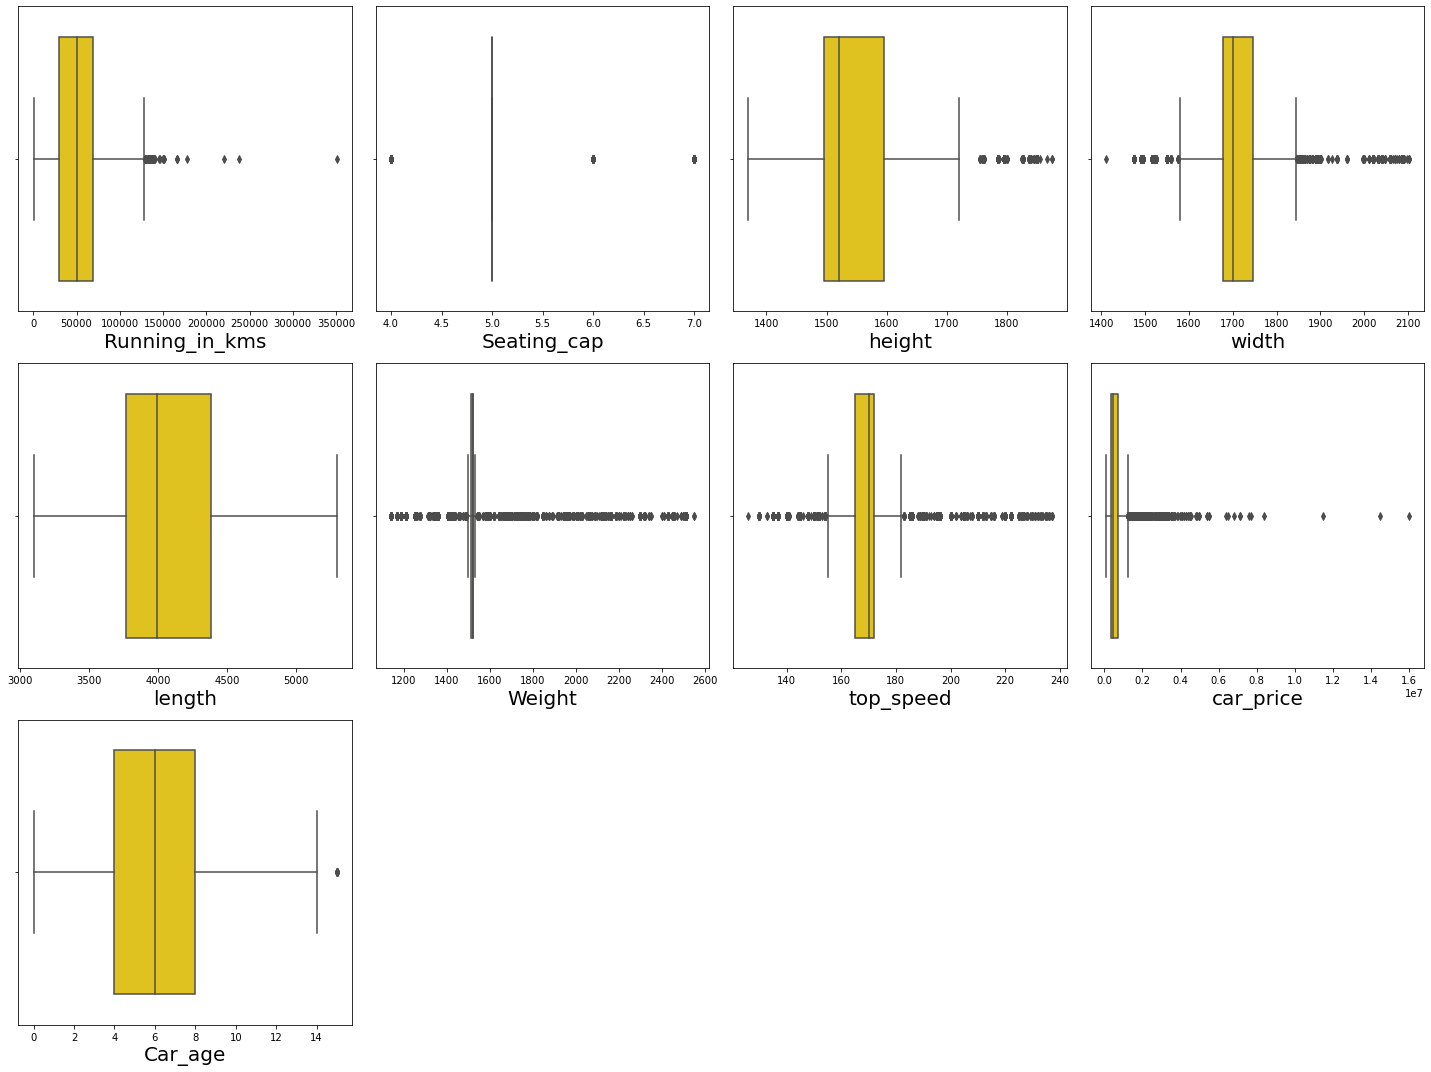

In [83]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df_new[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers has been reduced in all the columns.

### Checking for skewness:

In [84]:
# Now checking for numerical columns
num_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]!='object':
        num_columns.append(i)
print(num_columns)

['Running_in_kms', 'Seating_cap', 'height', 'width', 'length', 'Weight', 'top_speed', 'car_price', 'Car_age']


In [85]:
# checking for skewness in the dataset
df_new[num_columns].skew()

Running_in_kms    0.765299
Seating_cap       3.304908
height            1.316921
width             0.493568
length            0.367324
Weight            2.028378
top_speed         1.074363
car_price         6.794527
Car_age           0.398913
dtype: float64

I can notice there is skewness in all the numerical columns except width,length and Car_age. So we have to remove this skewness. Since car_price is my target no need to remove skewness in this column.

### Removing skewness using yeo-johnson method:

In [86]:
#Creating a list of skewed features
fea=['Running_in_kms', 'Seating_cap', 'height', 'Weight', 'top_speed']

Taking a list as fea with all the columns with skewness

In [87]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [88]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [89]:
# checking skewness again
df_new[fea].skew()

Running_in_kms   -0.054083
Seating_cap      -1.600536
height            0.000000
Weight            0.000000
top_speed         0.000000
dtype: float64

In all the columns skewness has reduced and in height column skewness is zero after removing which means this column has single entry throught out. So let me drop this column as it has no impact on model building.

In [90]:
# Droping height ,weight and top_speed columns
df_new = df_new.drop(["Weight"],axis=1)
df_new = df_new.drop(["height"],axis=1)
df_new = df_new.drop(["top_speed"],axis=1)

### Label Encoding:

In [91]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_type', 'Endine_disp', 'Gear_transmission', 'Milage_in_km/ltr', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns in df_new.

In [92]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [93]:
df_new[cat_col].head()

,Fuel_type,Endine_disp,Gear_transmission,Milage_in_km/ltr,color,front_brake_type,rear_brake_type,Car_Brand,Car_Model,city_name
0,1,6,1,7,64,8,4,15,153,2
1,4,6,1,7,176,8,4,15,136,2
2,4,6,1,7,93,0,4,15,153,2
3,4,6,1,7,176,0,4,15,59,2
4,1,6,1,7,140,8,4,25,166,2


Using label encoder i have encoded the categorical columns.

### Checking correlation using heat map:

In [94]:
cor=df_new.corr()
cor

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,front_brake_type,rear_brake_type,width,length,Car_Brand,Car_Model,car_price,city_name,Car_age
Fuel_type,1.000000,-0.321136,-0.010937,0.083240,-0.014051,-0.161796,-0.058822,-0.073820,0.111753,-0.412259,-0.356959,-0.017593,-0.051159,-0.245816,-0.009958,0.028757
Running_in_kms,-0.321136,1.000000,-0.022582,0.092829,-0.040935,0.125735,0.044335,0.143345,-0.015147,0.088313,0.166661,-0.000031,0.086244,-0.197391,0.164944,0.525781
Endine_disp,-0.010937,-0.022582,1.000000,-0.018128,0.784471,0.005185,0.000386,-0.025377,-0.008396,0.007562,0.015755,-0.010456,-0.028141,0.016341,-0.041178,-0.036172
Gear_transmission,0.083240,0.092829,-0.018128,1.000000,-0.017770,0.016886,-0.004586,0.005986,0.198376,-0.376726,-0.357573,0.082204,0.116169,-0.460663,0.016901,0.120627
Milage_in_km/ltr,-0.014051,-0.040935,0.784471,-0.017770,1.000000,0.005083,0.007843,-0.023754,-0.008230,0.005549,0.000611,-0.006178,-0.021377,0.017409,-0.040365,-0.042789
Seating_cap,-0.161796,0.125735,0.005185,0.016886,0.005083,1.000000,-0.014337,0.023572,-0.060682,0.168355,0.245123,0.125373,0.038264,0.030327,-0.030698,0.007501
color,-0.058822,0.044335,0.000386,-0.004586,0.007843,-0.014337,1.000000,-0.020330,-0.010709,-0.007675,-0.019017,-0.121540,-0.019568,-0.003606,-0.078578,0.052343
front_brake_type,-0.073820,0.143345,-0.025377,0.005986,-0.023754,0.023572,-0.020330,1.000000,0.132401,-0.051444,-0.018187,0.058739,0.001608,-0.081927,0.071274,0.216589
rear_brake_type,0.111753,-0.015147,-0.008396,0.198376,-0.008230,-0.060682,-0.010709,0.132401,1.000000,-0.245126,-0.315942,-0.025660,-0.001862,-0.215578,0.009920,0.008573
width,-0.412259,0.088313,0.007562,-0.376726,0.005549,0.168355,-0.007675,-0.051444,-0.245126,1.000000,0.766154,-0.134433,-0.003484,0.519648,-0.048947,-0.107918


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map

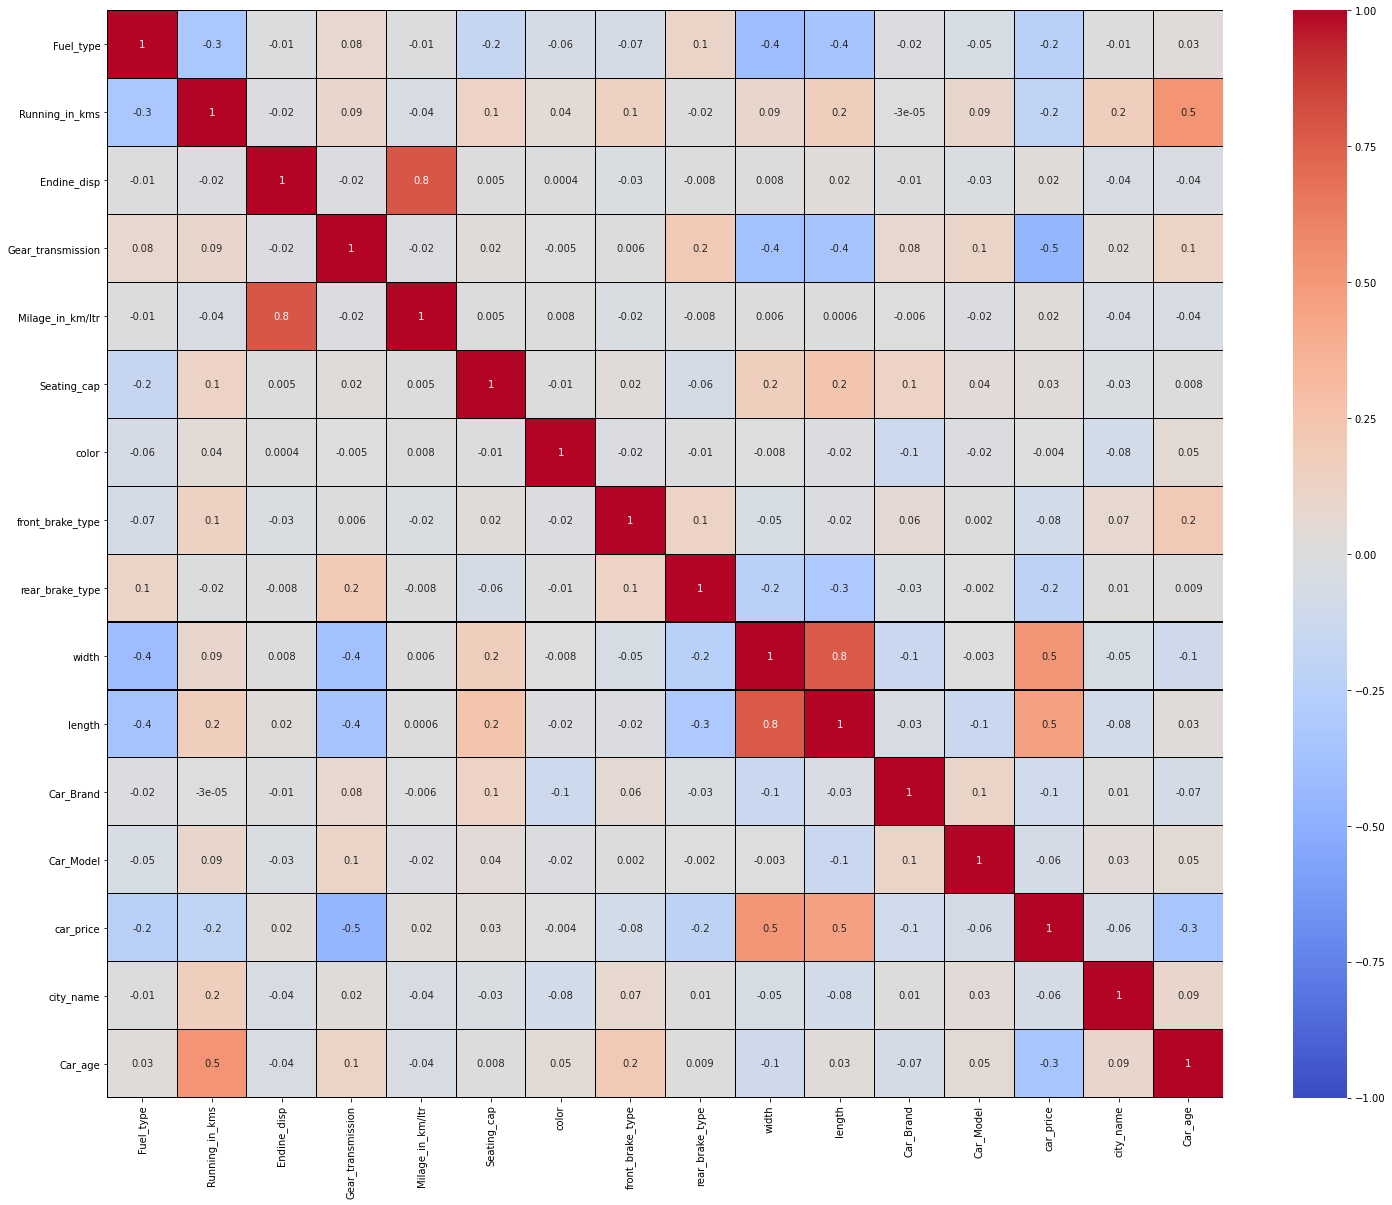

In [95]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

I can notice there is multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.

Let's visualize the correlation of all the features with target to get better insight.

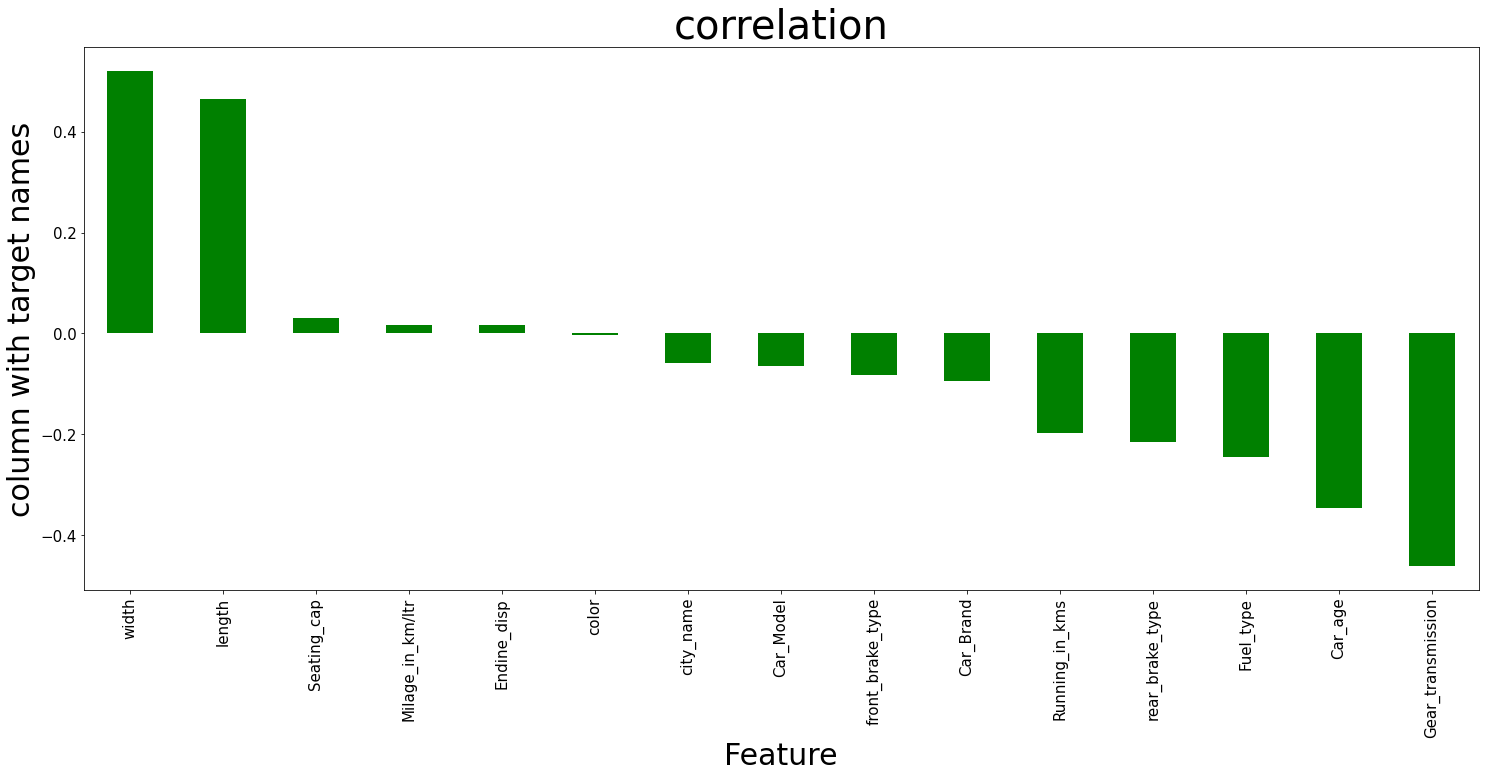

In [96]:
plt.figure(figsize=(25,10))
df_new.corr()['car_price'].sort_values(ascending=False).drop(['car_price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

color is less correlated with target. But will keep it and continue.

### Separating Features and Target:

In [97]:
x = df_new.drop("car_price",axis=1)
y = df_new["car_price"]

I have separated my target and independent columns.

### Scaling the data using Standard scaler:

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using Standard scaler.

In [99]:
X.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,front_brake_type,rear_brake_type,width,length,Car_Brand,Car_Model,city_name,Car_age
0,-1.335332,1.018295,0.033361,0.543401,0.032702,-0.155424,-0.991033,1.321357,0.251679,-0.123676,-0.187057,0.401475,0.794148,-3.947883,1.045676
1,0.723839,-0.928041,0.033361,0.543401,0.032702,-0.155424,0.986936,1.321357,0.251679,-1.745235,-1.361487,0.401475,0.517892,-3.947883,-1.295245
2,0.723839,-1.575651,0.033361,0.543401,0.032702,-0.155424,-0.478880,-0.761112,0.251679,0.246966,-0.187057,0.401475,0.794148,-3.947883,-1.295245
3,0.723839,-0.079665,0.033361,0.543401,0.032702,-0.155424,0.986936,-0.761112,0.251679,-2.162207,-1.061052,0.401475,-0.733387,-3.947883,-0.291993
4,-1.335332,1.505627,0.033361,0.543401,0.032702,-0.155424,0.351160,1.321357,0.251679,-0.086612,0.891780,1.927495,1.005403,-3.947883,-0.960828


This is the data of independent variables after scaling.

### Checking for multicolinearity issue using VIF:

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.425416,Fuel_type
1,1.716411,Running_in_kms
2,2.606181,Endine_disp
3,1.254867,Gear_transmission
4,2.607666,Milage_in_km/ltr
5,1.111539,Seating_cap
6,1.034537,color
7,1.094962,front_brake_type
8,1.152502,rear_brake_type
9,2.950143,width


Now the multicolinearity issue is solved.

### Finding Best Random State and Accuracy:

In [101]:
# importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9264556561756842  on Random_state  156


I got the best accuracy and random state.

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

### Regression Algorithms:

In [104]:
# importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

### i) RandomForestRegressor:

In [105]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 92.26915053974348
mean_squared_error: 26848612605.818417
mean_absolute_error: 78774.36033790452
root_mean_squared_error: 163855.46254494667

Cross validation score : 80.72252194004776

R2_Score - Cross Validation Score : 11.546628599695723


RFR is giving me 91.96% r2_score.

### ii) XGBRegressor:

In [106]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 84.7432069710975
mean_squared_error: 52985603683.78493
mean_absolute_error: 82994.10893793707
root_mean_squared_error: 230186.01974008963

Cross validation score : 80.06057092379723

R2_Score - Cross Validation Score : 4.682636047300264


XGBRegressor is giving me 92.95% r2_score.

### iii) GradientBoostingRegressor:

In [107]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 86.58658255114963
mean_squared_error: 46583709934.55606
mean_absolute_error: 105384.0977381275
root_mean_squared_error: 215832.5970157336

Cross validation score : 79.0167104666883

R2_Score - Cross Validation Score : 7.569872084461338


GradientBoostingRegressor is giving me 88.50% r2_score.

### iv) DecisionTreeRegressor:

In [108]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 35.306957527815705
mean_squared_error: 224673684897.98553
mean_absolute_error: 108934.15670692944
root_mean_squared_error: 473997.55790297646

Cross validation score : 48.37505707860244

R2_Score - Cross Validation Score : -13.068099550786734


DecisionTreeRegressor is giving me 78.47% r2_score.

### v) Bagging Regressor:

In [109]:
BR=BaggingRegressor()
BR.fit(X_train,y_train)
pred=BR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(BR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.89995168148208
mean_squared_error: 35076647915.34275
mean_absolute_error: 85216.1988768807
root_mean_squared_error: 187287.6074793598

Cross validation score : 74.66970983559041

R2_Score - Cross Validation Score : 15.230241845891669


Bagging Regressor is giving me 86.60% r2_score.

By looking into the difference of model accuracy and cross validation score i found DecisionTreeRegressor as the best model with 91.79% r2_score.

### Hyper parameter tunning for best model:

In [114]:
# importing necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [115]:
parameter = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter':['best','random'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

Giving DecisionTreeRegressor parameters.

In [116]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=10)

Running grid search CV for ExtraTreesRegressor

In [118]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15],
                         'splitter': ['best', 'random']})

Tunning the model using GCV.

In [119]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 2,
 'splitter': 'random'}

Got the best parameters for DecisionTreeRegressor.

In [120]:
Best_mod=DecisionTreeRegressor(criterion='friedman_mse',max_depth=15,max_features='auto',min_samples_split=4,splitter='random')
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 33.114308514121014
mean_squared_error: 232288576929.17316
mean_absolute_error: 133707.59651780702
RMSE value: 481963.2526751113


This is my model r2_score after tuning.I got 92.29% as r2_score which is gooddd!!!.Before model accuracy was 91.79% now after tunning it is 92.29%.

### Saving the model:

In [121]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Car_Price.pkl")

['Car_Price.pkl']

I have saved my model as Car_Price Using .pkl

### Predictions:

In [122]:
# Loading the saved model
model=joblib.load("Car_Price.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([1380000.        ,  324999.79166667,  370000.        , ...,
        436500.        ,  574333.33333333,  472031.6875    ])

In [123]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

Above are the predicted values and the actual values.They are almost similar.

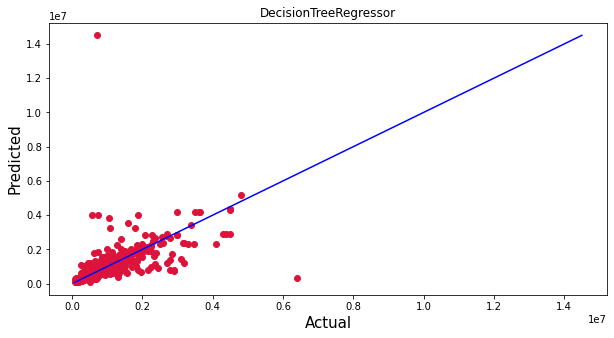

In [124]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("DecisionTreeRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

  # Thank You